In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import plotly.express as px

from matplotlib.ticker import FormatStrFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.patches as mpatches

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import pearsonr, linregress

# ice sheets and glaciers

In [2]:
data = pd.read_excel(r"C:\Users\pauls\Desktop\MSc_WaterResources\Tesis\1.-Tidy\Documents\Presentaciones\Proyecto\Data\icesheet_glaciers.xlsx",index_col="1992-2020")
data

,Superficie,Pérdida(Gt),IP_min,IP_max,Nivel(mm),In_min,In_max
1992-2020,,,,,,,
Glaciares,0.5,6200,4600,7800,17.1,12.7,21.5
Groenlandia,1.2,4890,4140,5640,13.5,11.4,15.6
Antártica,8.3,2670,1800,3540,7.4,5.0,9.8


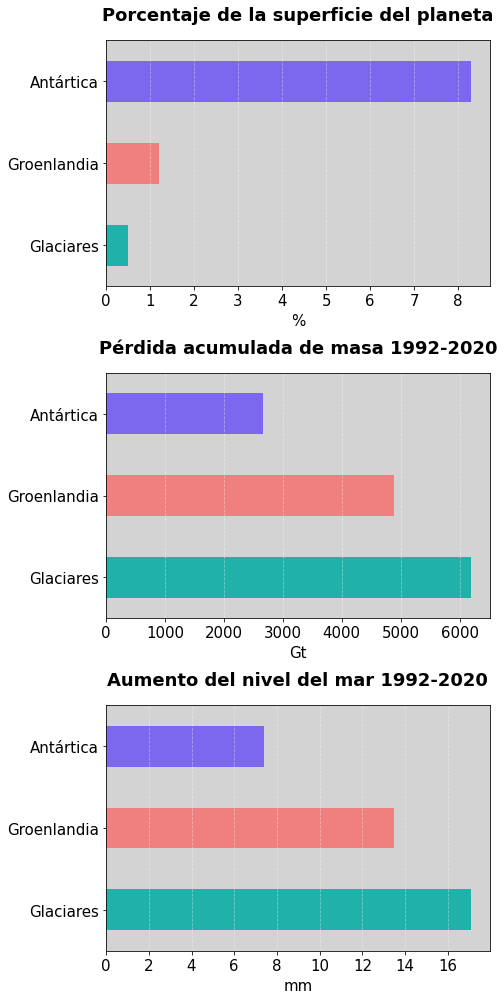

In [3]:
#Define subplots dimensions
fig = plt.figure(figsize=(7,14))

#Pressure
ax1 = fig.add_subplot(311)
data.iloc[:,0].plot(kind="barh",ax=ax1, color=["lightseagreen","lightcoral","mediumslateblue"],alpha=1,linewidth=2,label="Río Mocho")
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white",axis="x",alpha=0.4)
ax1.set_ylabel("",labelpad=5,fontsize=30)
ax1.set_xlabel("%",labelpad=5,fontsize=15)
plt.yticks(rotation = 0,fontsize=15)
plt.xticks(rotation = 0,fontsize=15)
plt.title("Porcentaje de la superficie del planeta",fontsize=18,fontweight="bold",pad=20)

ax2 = fig.add_subplot(312)
data.iloc[:,1].plot(kind="barh",ax=ax2, color=["lightseagreen","lightcoral","mediumslateblue"],alpha=1,linewidth=2,label="Río Mocho")
ax2.set_facecolor("lightgray")
plt.grid(ls="--",color="white",axis="x",alpha=0.4)
ax2.set_ylabel("",labelpad=5,fontsize=30)
ax2.set_xlabel("Gt",labelpad=5,fontsize=15)
plt.yticks(rotation = 0,fontsize=15)
plt.xticks(rotation = 0,fontsize=15)
plt.title("Pérdida acumulada de masa 1992-2020",fontsize=18,fontweight="bold",pad=20)


ax3 = fig.add_subplot(313)
data.iloc[:,4].plot(kind="barh",ax=ax3, color=["lightseagreen","lightcoral","mediumslateblue"],alpha=1,linewidth=2,label="Río Mocho")
ax3.set_facecolor("lightgray")
plt.grid(ls="--",color="white",axis="x",alpha=0.4)
ax3.set_ylabel("",labelpad=5,fontsize=30)
ax3.set_xlabel("mm",labelpad=5,fontsize=15)
plt.yticks(rotation = 0,fontsize=15)
plt.xticks(rotation = 0,fontsize=15)
plt.title("Aumento del nivel del mar 1992-2020",fontsize=18,fontweight="bold",pad=20)

plt.tight_layout()
fig.savefig(r"C:\Users\pauls\Desktop\MSc_WaterResources\Tesis\1.-Tidy\Documents\Presentaciones\Proyecto\Figures\icesheets_glaciers.png", bbox_inches="tight",dpi=300) #TOKEN

# BM_hist

In [2]:
path = r"C:\Users\pauls\Desktop\MSc_WaterResources\Tesis\1.-Tidy\Documents\Presentaciones\Proyecto\Data\bm_hist.xlsx"
data = pd.read_excel(path,index_col="hyd_year").iloc[:,0:6]
data_pos = data[data<0]
data_neg = data[data>0]

data_2 = pd.DataFrame(data.iloc[:,2])
data_2["in"] = range(len(data_2.index))
data_2 = data_2.dropna()
data_2

,bm(mweq),in
hyd_year,,
2003-2004,-0.88,0
2004-2005,0.36,1
2005-2006,-0.68,2
2009-2010,0.69,6
2010-2011,-0.37,7
2011-2012,-2.14,8
2012-2013,-1.79,9
2015-2016,-1.32,12
2016-2017,-2.47,13


### test pearson and p value

In [3]:
X = sm.add_constant(data_2.iloc[:,1])

# Ajustar el modelo de regresión lineal
model = sm.OLS(data_2.iloc[:,0], X).fit()

# Obtener los resultados del modelo
results = model.summary()
results


#data_2.iloc[:,1], data_2.iloc[:,0]

C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bm(mweq)   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     6.356
Date:                Sun, 19 May 2024   Prob (F-statistic):             0.0256
Time:                        19:11:05   Log-Likelihood:                -18.404
No. Observations:                  15   AIC:                             40.81
Df Residuals:                      13   BIC:                             42.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1684      0.455     -0.370      0.717      -1.152       0.815
in            -0.0948      0.038     -2.521      0.026      -0.176      -0.014
==============================================================================
Omnibus:                        2.521   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.106
Skew:                           0.191   Prob(JB):                        0.575
Kurtosis:                       1.726   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
correlation, p_value = pearsonr(data_2.iloc[:,1], data_2.iloc[:,0])

# Imprimir la correlación de Pearson y el valor p
print(f"Correlación de Pearson: {correlation}")
print(f"Valor p: {p_value}")

# Calcular la regresión lineal y obtener el valor p
slope, intercept, r_value, p_value, std_err = linregress(data_2.iloc[:,1], data_2.iloc[:,0])

Correlación de Pearson: -0.5730285932153176
Valor p: 0.025553630787988026


In [5]:
correlation, p_value = pearsonr(range(len(data.iloc[:,1])), data.iloc[:,2])
correlation, p_value

ValueError: array must not contain infs or NaNs

In [6]:
slope,intercept, r_value, p_value, std_err

(-0.09480326295585415,
 -0.1683925143953936,
 -0.5730285932153176,
 0.025553630787987995,
 0.03760477725990819)

In [7]:
slope, intercept

(-0.09480326295585415, -0.1683925143953936)

## plot

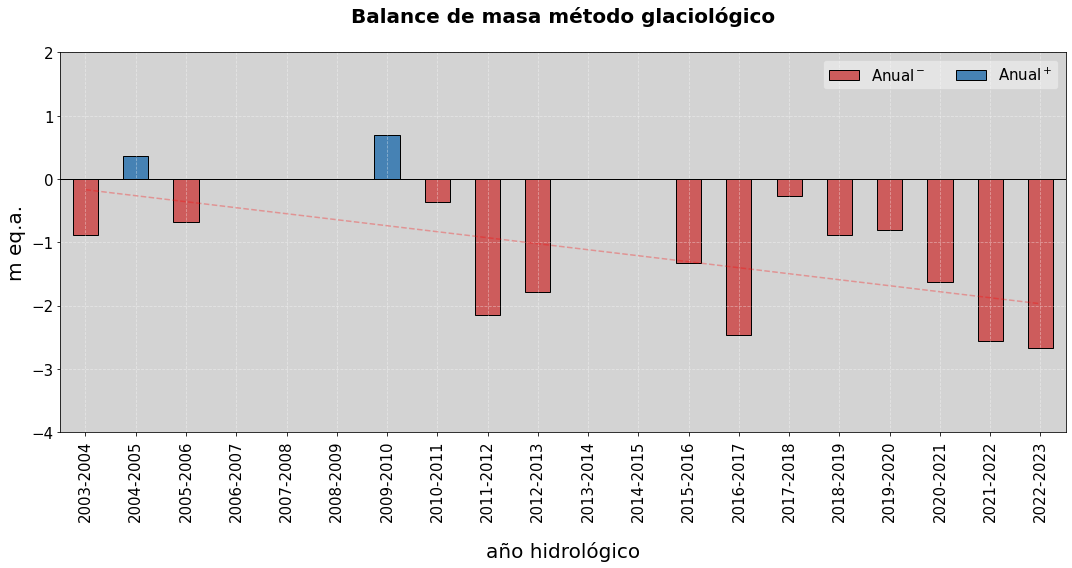

In [9]:
#Define subplots dimensions
fig = plt.figure(figsize=(15,8))

#Pressure
ax1 = fig.add_subplot(111)

#slope, intercept = -0.11649, 0.10838
coefficients = np.polyfit(data_2.iloc[:,1], data_2.iloc[:,0], 1)
slope, intercept = coefficients

x_trend = np.arange(len(data.index))
y_trend = slope * x_trend + intercept

plt.plot(x_trend,y_trend,color="red",linestyle="--",alpha=0.3)

#data.iloc[:,4].plot(kind="bar",ax=ax1, color="dimgrey",alpha=1,linewidth=1,label="Invernal",edgecolor="black") #steelblue
#data.iloc[:,5].plot(kind="bar",ax=ax1, color="darkgrey",alpha=1,linewidth=1,label="Estival",edgecolor="black") #indianred
data_pos.iloc[:,2].plot(kind="bar",ax=ax1, color="indianred",alpha=1,linewidth=1,label="Anual$^-$",edgecolor="black")
data_neg.iloc[:,2].plot(kind="bar",ax=ax1, color="steelblue",alpha=1,linewidth=1,label="Anual$^+$",edgecolor="black")

plt.axhline(0,0,6,color="black",linewidth=1,label="")

#plt.text(7.4, -3.8, 'Fuente: Rivera et al., 2005; Bown et al., 2007; Schaefer et al., 2017; WGMS, 2020; 2021; DGA, 2021; 2022; 2023.', fontsize = 10)
#plt.text(16, -6.5, 'Elaborado por: Paul Sandoval Quilodrán', fontsize = 8)

plt.legend(ncol=2,fontsize=15,framealpha=0.4)
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white",axis="both",alpha=0.4)
plt.ylim(-4,2)
ax1.set_ylabel("m eq.a.",labelpad=5,fontsize=20)
ax1.set_xlabel("año hidrológico",labelpad=20,fontsize=20)
plt.yticks(rotation = 0,fontsize=15)
plt.xticks(rotation = 90,fontsize=15)
plt.title("Balance de masa método glaciológico",fontsize=20,fontweight="bold",pad=30)
plt.tight_layout()
#fig.set_facecolor("white")
fig.savefig(r"P:\Projects\GlacioUACH\glaciares_chilenos\BM_Mocho_act.png", bbox_inches="tight",dpi=500) #TOKEN

# Daily variation

In [34]:
#Read data
mocho = pd.read_csv(r"C:/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/streamflow/caudales/mocho_v2.csv",index_col="date")

#Define index as datetime
mocho.index = pd.to_datetime(mocho.index)#.dt.strftime('%Y-%m-%d %H:%M')

mocho = mocho[(mocho.index >= pd.to_datetime("2023-01-08")) & (mocho.index <= pd.to_datetime("2023-01-14"))]

mocho = mocho.groupby(mocho.index.hour).mean()

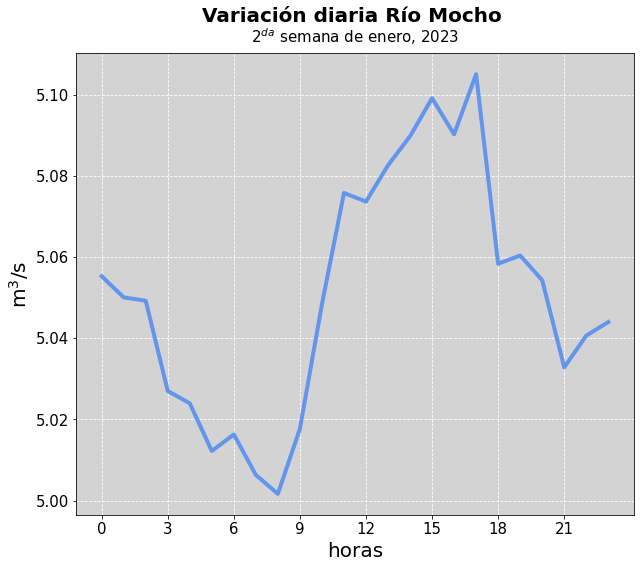

In [72]:
#Define subplots dimensions
fig = plt.figure(figsize=(9,8))

#Plot
ax1 = fig.add_subplot(111)
mocho.iloc[:,1].plot(ax=ax1, color="cornflowerblue",alpha=1,linewidth=4)
#Label
ax1.set_ylabel("m$^3$/s",labelpad=5,fontsize=20)
ax1.set_xlabel("horas",labelpad=5,fontsize=20)
#Configuration
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
plt.title("2$^d$$^a$ semana de enero, 2023",fontsize=15,pad=10)
#fig.set_facecolor("white")
plt.yticks(rotation = 0,fontsize=15)
plt.xticks(np.arange(min(mocho.index), max(mocho.index)+1, 3.0),fontsize=15)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.suptitle("         Variación diaria Río Mocho",fontsize=20,fontweight="bold")

plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig(r"C:/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/Figures/Rio_Mocho.png",bbox_inches='tight',dpi=300) #TOKEN

In [22]:
#Read path
mocho2_path = r"C:\Users\pauls\Desktop\MSc_WaterResources\Tesis\Climate_forcing\Mocho\rawdata-ago2022-april2023.csv"

#Read csv
aws_mocho2 = pd.read_csv(mocho2_path)

#Define date
d_mocho2 = pd.to_datetime(aws_mocho2["TS"]) - pd.Timedelta(hours=1, minutes=30, seconds=0)

#Select just necessary columns
aws_mocho2.index = d_mocho2

aws_mocho2 = aws_mocho2[(aws_mocho2.index >= pd.to_datetime("2023-01-08")) & (aws_mocho2.index <= pd.to_datetime("2023-01-14"))]

aws_mocho2 = aws_mocho2["AirTC_Avg Deg C"] 

aws_mocho2 = pd.DataFrame(aws_mocho2.groupby(aws_mocho2.index.hour).mean())

aws_mocho2

,AirTC_Avg Deg C
TS,
0,8.295209
1,7.615342
2,7.468619
3,7.864658
4,7.435884
5,7.724269
6,9.067171
7,10.096857
8,10.223231


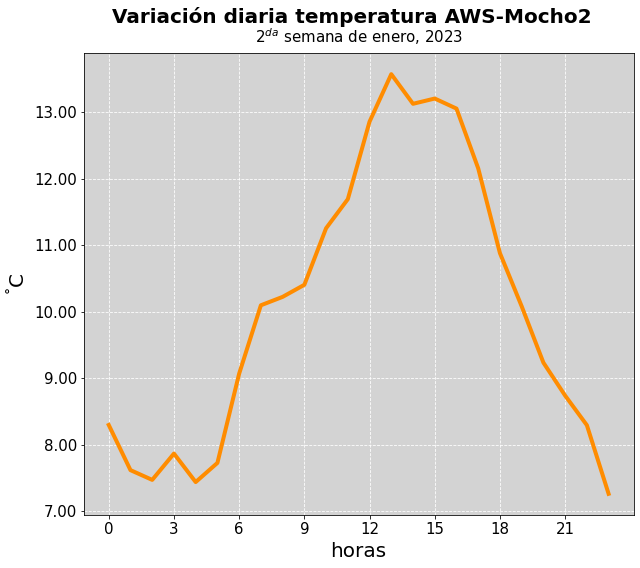

In [31]:
#Define subplots dimensions
fig = plt.figure(figsize=(9,8))

#Plot
ax1 = fig.add_subplot(111)
aws_mocho2.iloc[:,0].plot(ax=ax1, color="darkorange",alpha=1,linewidth=4)
#Label
ax1.set_ylabel("$^°$C",labelpad=5,fontsize=20)
ax1.set_xlabel("horas",labelpad=5,fontsize=20)
#Configuration
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
plt.title("2$^d$$^a$ semana de enero, 2023",fontsize=15,pad=10)
#fig.set_facecolor("white")
plt.yticks(rotation = 0,fontsize=15)
plt.xticks(np.arange(min(aws_mocho2.index), max(aws_mocho2.index)+1, 3.0),fontsize=15)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.suptitle("         Variación diaria temperatura AWS-Mocho2",fontsize=20,fontweight="bold")

plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig(r"C:/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/Figures/temperatura-mocho2.png",bbox_inches='tight',dpi=300) #TOKEN